In [241]:
import numpy as np
from sklearn.datasets.samples_generator import make_classification 
import pylab

In [242]:
x, y = make_classification(n_features=2, n_redundant=0, n_informative=2)

In [243]:
m, n = np.shape(x)
m, n

(100, 2)

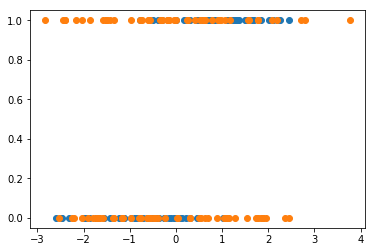

In [244]:
pylab.plot(x, y, 'o')
pylab.show()

In [245]:
X = np.c_[ np.ones(m), x]
X[:5]

array([[ 1.        , -0.71113759,  0.31101794],
       [ 1.        ,  0.90095559, -2.16929394],
       [ 1.        ,  1.28840148, -0.15521425],
       [ 1.        ,  0.74884259, -0.29709956],
       [ 1.        , -2.31266821,  0.05036327]])

In [246]:
# y лист значений
y[:5]

array([0, 1, 1, 1, 0])

### Градиентный спуск

Функция потерь logloss

$$J = -\sum_{i=1}^{N} y_i\log (h_\theta(x_i)) + (1 - y_i)\log(1 - h_\theta(x_i))$$

In [247]:
# шаг алгоритма
alpha = 0.01

In [248]:
def gradient_descent_2(alpha, x, y, numIterations):

    m = X.shape[0] # 100
    theta = np.ones(3) # коэффициенты 
    x_transpose = X.transpose() # транспонированная матрица x
    
    for iter in range (0, numIterations):        
        
        h = 1 / ( 1 + np.exp(-np.dot (X, theta))) # предсказание / hypothesis        
        loss = h - y        
        
        J  = - np.sum (y * np.log(h) + (1 - y) * np.log(1 - h)) / m # функция ошибки logloss        
        
        print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update theta w/gradient
    
    return theta

In [250]:
%%time
theta = gradient_descent_2(alpha, X, y, 1000)

iter 0 | J: 0.723
iter 1 | J: 0.721
iter 2 | J: 0.719
iter 3 | J: 0.717
iter 4 | J: 0.716
iter 5 | J: 0.714
iter 6 | J: 0.712
iter 7 | J: 0.710
iter 8 | J: 0.709
iter 9 | J: 0.707
iter 10 | J: 0.705
iter 11 | J: 0.704
iter 12 | J: 0.702
iter 13 | J: 0.700
iter 14 | J: 0.699
iter 15 | J: 0.697
iter 16 | J: 0.695
iter 17 | J: 0.694
iter 18 | J: 0.692
iter 19 | J: 0.690
iter 20 | J: 0.689
iter 21 | J: 0.687
iter 22 | J: 0.686
iter 23 | J: 0.684
iter 24 | J: 0.682
iter 25 | J: 0.681
iter 26 | J: 0.679
iter 27 | J: 0.678
iter 28 | J: 0.676
iter 29 | J: 0.674
iter 30 | J: 0.673
iter 31 | J: 0.671
iter 32 | J: 0.670
iter 33 | J: 0.668
iter 34 | J: 0.667
iter 35 | J: 0.665
iter 36 | J: 0.664
iter 37 | J: 0.662
iter 38 | J: 0.661
iter 39 | J: 0.659
iter 40 | J: 0.658
iter 41 | J: 0.656
iter 42 | J: 0.655
iter 43 | J: 0.653
iter 44 | J: 0.652
iter 45 | J: 0.650
iter 46 | J: 0.649
iter 47 | J: 0.647
iter 48 | J: 0.646
iter 49 | J: 0.644
iter 50 | J: 0.643
iter 51 | J: 0.642
iter 52 | J: 0.640
ite

In [251]:
theta

array([ 0.1801353 ,  1.90850523, -0.23982309])

### Встроенные методы

In [252]:
from sklearn.linear_model import SGDClassifier

In [253]:
#x, y = make_classification(n_features=2, n_redundant=0, n_informative=2)

In [254]:
model = SGDClassifier(alpha = 0.01, max_iter = 1000, loss = 'log', tol = 1e-3, shuffle=True)

In [255]:
model.fit(x, y)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [256]:
model.intercept_, model.coef_

(array([-0.07489408]), array([[ 2.5129623 , -0.32983825]]))

In [257]:
y_predict_sgd = model.predict( x )

In [258]:
y_predict_sgd

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])